In [1]:
import pandas as pd
from terminology_api import snomed_utils
import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3

#import ast
import numpy as np

KeyboardInterrupt: 

# 1. Run SNOMED ECL queries

In [ ]:
# Define server URI
SNOMED_SERVER = 'https://browser.ihtsdotools.org/snowstorm/snomed-ct/'

# Define the SNOMED IDs for OPCS and ICD, according to the SNOMED UK edition
REFSET_ID_OPCS = 1126441000000105
REFSET_ID_ICD = 999002271000000101

OUTPUT_NAME = 'appendix'

# List available SNOMED versions
snomed_systems = snomed_utils.get_snomed_editions(SNOMED_SERVER)
[  [s['name'], s['branchPath'], s['shortName']]  for s in snomed_systems['items'] ]

[['International Edition', 'MAIN', 'SNOMEDCT'],
 ['Argentinian Edition', 'MAIN/SNOMEDCT-ES/SNOMEDCT-AR', 'SNOMEDCT-AR'],
 ['Austrian Edition', 'MAIN/SNOMEDCT-AT', 'SNOMEDCT-AT'],
 ['Australian Edition', 'MAIN/SNOMEDCT-AU', 'SNOMEDCT-AU'],
 ['Belgian Edition', 'MAIN/SNOMEDCT-BE', 'SNOMEDCT-BE'],
 ['Canadian Edition', 'MAIN/SNOMEDCT-CA', 'SNOMEDCT-CA'],
 ['Common German Translation', 'MAIN/SNOMEDCT-CDE', 'SNOMEDCT-CDE'],
 ['Common French Translation', 'MAIN/SNOMEDCT-CFR', 'SNOMEDCT-CFR'],
 ['Swiss Edition', 'MAIN/SNOMEDCT-CH', 'SNOMEDCT-CH'],
 ['Germany Edition', 'MAIN/SNOMEDCT-DE', 'SNOMEDCT-DE'],
 ['Danish Edition', 'MAIN/SNOMEDCT-DK', 'SNOMEDCT-DK'],
 ['Estonian Edition', 'MAIN/SNOMEDCT-EE', 'SNOMEDCT-EE'],
 ['Spanish Edition', 'MAIN/SNOMEDCT-ES', 'SNOMEDCT-ES'],
 ['Finnish Edition', 'MAIN/SNOMEDCT-FI', 'SNOMEDCT-FI'],
 ['Genomics', 'MAIN/SNOMEDCT-GEN', 'SNOMEDCT-GEN'],
 ['Irish Edition', 'MAIN/SNOMEDCT-IE', 'SNOMEDCT-IE'],
 ['Netherlands Edition', 'MAIN/SNOMEDCT-NL', 'SNOMEDCT-NL'],


In [ ]:
# choose which edition to use
EDITION_PATH = 'MAIN'
EDITION_NAME = 'SNOMEDCT'

# from this edition, get available versions
versions = snomed_utils.get_snomed_edition_versions(SNOMED_SERVER, EDITION_NAME)
[  v['version'] for v in versions['items'] ]

['2002-01-31',
 '2002-07-31',
 '2003-01-31',
 '2003-07-31',
 '2004-01-31',
 '2004-07-31',
 '2005-01-31',
 '2005-07-31',
 '2006-01-31',
 '2006-07-31',
 '2007-01-31',
 '2007-07-31',
 '2008-01-31',
 '2008-07-31',
 '2009-01-31',
 '2009-07-31',
 '2010-01-31',
 '2010-07-31',
 '2011-01-31',
 '2011-07-31',
 '2012-01-31',
 '2012-07-31',
 '2013-01-31',
 '2013-07-31',
 '2014-01-31',
 '2014-07-31',
 '2015-01-31',
 '2015-07-31',
 '2016-01-31',
 '2016-07-31',
 '2017-01-31',
 '2017-07-31',
 '2018-01-31',
 '2018-07-31',
 '2019-01-31',
 '2019-07-31',
 '2020-01-31',
 '2020-03-09',
 '2020-07-31',
 '2021-01-31',
 '2021-07-31',
 '2022-01-31',
 '2022-02-28',
 '2022-03-31',
 '2022-04-30',
 '2022-05-31',
 '2022-06-30',
 '2022-07-31',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30',
 '2022-12-31',
 '2023-01-31',
 '2023-02-28',
 '2023-03-31',
 '2023-04-30',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01']

In [ ]:
# Define our SNOMED queries
ecl_queries = dict()
#femur ecl_queries[0] = '( < 71388002|Procedure| : 405813007|Procedure site - Direct| = << (* : R 363698007|Finding site|  = <<263225007) ) '
#appendix
#ecl_queries[0] = '( < 71388002|Procedure| : 405813007|Procedure site - Direct| = << (* : R 363698007|Finding site|  = <<74400008) ) '
ecl_queries[0] = '(< 71388002|Procedure| : 405813007|Procedure site - Direct| = <<66754008 )'


In [ ]:
BRANCH = EDITION_PATH+'/'+'2023-07-31'

# Run query
q = 0

OUTPUT_PATH = 'codelists/output/'+OUTPUT_NAME+'_query'+str(q)+'_'

# Run the query against the SNOMED server
query_results = snomed_utils.run_ecl_query(ecl_queries[q], 10000, SNOMED_SERVER+BRANCH)

# Shape query into a dataframe and preview
query_results_df = pd.DataFrame(query_results['items'])
print('-> Query results')
print( '  ',len(query_results_df) , 'rows retrieved')

display( query_results_df.head() )

# Extract the resulting SNOMED IDs and SNOMED terms
query_result_snomed_ids = [int(i) for i in query_results_df['id']]
query_result_snomed_terms = [i['term'] for i in query_results_df['fsn']]
# Create a dictionary to map between the two
snomed_id_to_term = dict( zip( query_result_snomed_ids, query_result_snomed_terms ) )


# Output a SNOMED IDs and names to disk
query_results_output = query_results_df[['conceptId','idAndFsnTerm']]
snomed_output_path = OUTPUT_PATH+'snomed.csv'

query_results_output.to_csv(snomed_output_path, index=False)

print('-> Exported SNOMED codelist to',snomed_output_path)
display( query_results_output.head() )

-> Query results
   24 rows retrieved


,conceptId,active,definitionStatus,moduleId,effectiveTime,fsn,pt,id,idAndFsnTerm
0,711169008,True,FULLY_DEFINED,900000000000207008,20150731,{'term': 'Closure of appendicovesicostomy (pro...,"{'term': 'Closure of appendicovesicostomy', 'l...",711169008,711169008 | Closure of appendicovesicostomy (p...
1,710197007,True,FULLY_DEFINED,900000000000207008,20150731,{'term': 'Ultrasonography of appendix (procedu...,"{'term': 'Ultrasonography of appendix', 'lang'...",710197007,710197007 | Ultrasonography of appendix (proce...
2,708876004,True,FULLY_DEFINED,900000000000207008,20150731,{'term': 'Laparoscopic appendectomy using robo...,{'term': 'Robot assisted laparoscopic appendec...,708876004,708876004 | Laparoscopic appendectomy using ro...
3,443935000,True,PRIMITIVE,900000000000207008,20100131,{'term': 'Excision of ruptured appendix by ope...,{'term': 'Excision of ruptured appendix by ope...,443935000,443935000 | Excision of ruptured appendix by o...
4,443037006,True,FULLY_DEFINED,900000000000207008,20100131,{'term': 'Percutaneous drainage of abscess of ...,{'term': 'CT guided percutaneous drainage of a...,443037006,443037006 | Percutaneous drainage of abscess o...


-> Exported SNOMED codelist to codelists/output/query0_femursnomed.csv


,conceptId,idAndFsnTerm
0,711169008,711169008 | Closure of appendicovesicostomy (p...
1,710197007,710197007 | Ultrasonography of appendix (proce...
2,708876004,708876004 | Laparoscopic appendectomy using ro...
3,443935000,443935000 | Excision of ruptured appendix by o...
4,443037006,443037006 | Percutaneous drainage of abscess o...


## 2. Map SNOMED codes to OPCS

In [ ]:
# Load the SNOMED to ICD and OPCS mapping file
mapping_icd, mapping_opcs = snomed_utils.load_mapping('codelists/mappings/der2_iisssciRefset_ExtendedMapUKCLFull_GB1000000_20220803.txt', REFSET_ID_ICD, REFSET_ID_OPCS)

# From the mapping file, select only the OPCS codes that map to SNOMED concepts in our query result
mapping_opcs = mapping_opcs[ mapping_opcs['referencedComponentId'].isin( query_result_snomed_ids ) ]
# Remove NAs
mapping_opcs = mapping_opcs[mapping_opcs['mapTarget'].notna()]


# Add columns with text descriptions
opcs4_dict = pd.read_csv('codelists/OPCS4_dict.tsv', sep='\t') # Read in OPCS4->text map
opcs_code_to_text = dict( zip(opcs4_dict['coding'], opcs4_dict['meaning']) )

mapping_opcs['opcs_term'] = [opcs_code_to_text[i] for i in mapping_opcs['mapTarget']]
mapping_opcs['referencedComponentTerm'] = [snomed_id_to_term[int(i)] for i in mapping_opcs['referencedComponentId']]

print('-> Retrieved OPCS to SNOMED map')
display( mapping_opcs.head() )





# Export a dataframe of just the OPCS code and its text description
opcs_codelist_out = pd.DataFrame(data={
    'snomed':mapping_opcs['referencedComponentId'],
    'opcs':mapping_opcs['mapTarget'],
    'opcs_term':mapping_opcs['opcs_term'],
})
opcs_codelist_out = opcs_codelist_out.drop_duplicates()

opcs_output_path = OUTPUT_PATH+'opcs.csv'


print('-> Exported OPCS codelist to',opcs_output_path)
print('  ',len( opcs_codelist_out['opcs'].unique() ),'OPCS codes found')
display(opcs_codelist_out.head())
#opcs_mappings_out['category'] = [category_dict.get(i) for i in opcs_mappings_out['snomed']]

opcs_codelist_out.to_csv(opcs_output_path, index=False)


-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
628,1126441000000105,49586007,1,1,H144,H14.4 Appendicocaecostomy,Appendicocecostomy (procedure)
83911,1126441000000105,32578005,2,3,Y205,Y20.5 Percutaneous biopsy NOC,Biopsy of appendix (procedure)
105693,1126441000000105,32578005,2,5,Y203,Y20.3 Biopsy of lesion of organ NOC,Biopsy of appendix (procedure)
233338,1126441000000105,710197007,3,1,Y983,Y98.3 Radiology of three body areas (or 20-40 ...,Ultrasonography of appendix (procedure)
257545,1126441000000105,32578005,1,2,H031,H03.1 Drainage of abscess of appendix,Biopsy of appendix (procedure)


-> Exported OPCS codelist to codelists/output/query0_femuropcs.csv
   50 OPCS codes found


,snomed,opcs,opcs_term
628,49586007,H144,H14.4 Appendicocaecostomy
83911,32578005,Y205,Y20.5 Percutaneous biopsy NOC
105693,32578005,Y203,Y20.3 Biopsy of lesion of organ NOC
233338,710197007,Y983,Y98.3 Radiology of three body areas (or 20-40 ...
257545,32578005,H031,H03.1 Drainage of abscess of appendix


In [ ]:
opcs_codelist_out['opcs_term'].unique()

array(['H14.4 Appendicocaecostomy', 'Y20.5 Percutaneous biopsy NOC',
       'Y20.3 Biopsy of lesion of organ NOC',
       'Y98.3 Radiology of three body areas (or 20-40 minutes)',
       'H03.1 Drainage of abscess of appendix',
       'H02.9 Unspecified other excision of appendix',
       'H02.4 Incidental appendicectomy',
       'H01.8 Other specified emergency excision of appendix',
       'H01.2 Emergency excision of abnormal appendix NEC',
       'Y98.5 Radiology of > 4 body areas (or > 40 minutes)',
       'Y20.8 Other specified biopsy of organ NOC',
       'H03.3 Exteriorisation of appendix',
       'H02.3 Prophylactic appendicectomy NEC',
       'H02.2 Planned delayed appendicectomy NEC',
       'Y20.9 Unspecified biopsy of organ NOC',
       'Y20.7 Vacuum biopsy of lesion of organ NOC', 'Z28.1 Appendix',
       'H03.9 Unspecified other operations on appendix',
       'H02.1 Interval appendicectomy',
       'Y75.2 Laparoscopic approach to abdominal cavity NEC',
       'Y05.1 Tot

## 2. Map SNOMED codes to ICD9Proc

In [ ]:
# Read in ICD9 to SNOMED map (it comes in two files: 1-to-1 and 1-to-many maps)
mapping_icd9_1to1 = pd.read_csv('codelists/mappings/ICD/ICD9CMV3_SNOMED_MAP_1T1_202212.txt', sep='\t')

print('-> Retrieved ICD9 to SNOMED (1-to-1) map')
display(mapping_icd9_1to1.head())

mapping_icd9_1toM = pd.read_csv('codelists/mappings/ICD/ICD9CMV3_SNOMED_MAP_1TM_202212.txt', sep='\t')
mapping_icd9_1toM = mapping_icd9_1toM[ ~ mapping_icd9_1toM['SNOMED_CID'].isna() ] # remove rows where SNOMED ID is missing
mapping_icd9_1toM['SNOMED_CID'] = mapping_icd9_1toM['SNOMED_CID'].astype(int).astype(str) # cast to int then back to str to fix SNOMED IDs with an extra .0

print('-> Retrieved ICD9 to SNOMED (1-to-many) map')
display(mapping_icd9_1toM.head())

# Merge the two maps
mapping_icd9 = pd.concat([mapping_icd9_1to1,mapping_icd9_1toM])

-> Retrieved ICD9 to SNOMED (1-to-1) map


,ICD_CODE,ICD_NAME,IS_CURRENT_ICD,IP_USAGE,SNOMED_CID,SNOMED_FSN
0,99.04,Transfusion of packed cells,1,6.574725,288170000,Packed blood cell transfusion (procedure)
1,39.95,Hemodialysis,1,2.883691,302497006,Hemodialysis (procedure)
2,88.56,Coronary arteriography using two catheters,1,2.391407,49673009,Coronary angiography using two catheters (proc...
3,37.22,Left heart cardiac catheterization,1,2.274478,67629009,Catheterization of left heart (procedure)
4,88.72,Diagnostic ultrasound of heart,1,1.996352,40701008,Echocardiography (procedure)


-> Retrieved ICD9 to SNOMED (1-to-many) map


,ICD_CODE,ICD_NAME,IS_CURRENT_ICD,IP_USAGE,SNOMED_CID,SNOMED_FSN
0,38.93,"Venous catheterization, not elsewhere classified",1,3.818248,392230005,Catheterization of vein (procedure)
2,96.71,Continuous invasive mechanical ventilation for...,1,1.506401,40617009,Artificial respiration (procedure)
3,45.13,Other endoscopy of small intestine,1,1.172203,76009000,Esophagogastroduodenoscopy (procedure)
5,96.72,Continuous invasive mechanical ventilation for...,1,0.963290,40617009,Artificial respiration (procedure)
6,99.07,Transfusion of other serum,1,0.945130,13569004,Transfusion of plasma (procedure)


In [ ]:
# Filter to only include concepts in our SNOMED list
mapping_icd9 = mapping_icd9[ mapping_icd9['SNOMED_CID'].isin(query_result_snomed_ids) ]
display( mapping_icd9[['ICD_CODE','ICD_NAME','SNOMED_CID','SNOMED_FSN']].head() )

# output just the SNOMED, ICD and ICD name columns as a map
icd9_codelist_out = pd.DataFrame(data={
    'snomed': mapping_icd9['SNOMED_CID'],
    'icd9': mapping_icd9['ICD_CODE'],
    'icd_term': mapping_icd9['ICD_NAME'],
})
icd9_codelist_out = icd9_codelist_out.drop_duplicates()

#icd9_out['category'] = [category_dict.get(i) for i in icd9_out['snomed']]
icd9_output_path = OUTPUT_PATH+'icd9.csv'
print('-> Exported ICD-9 codelist to',icd9_output_path)
print('  ',len( icd9_codelist_out['icd9'].unique() ),'ICD-9 codes found')
icd9_codelist_out.to_csv(icd9_output_path)

,ICD_CODE,ICD_NAME,SNOMED_CID,SNOMED_FSN
112,47.01,Laparoscopic appendectomy,6025007,Laparoscopic appendectomy (procedure)
1342,47.91,Appendicostomy,42332004,Fistulization of appendix (procedure)
1615,47.92,Closure of appendiceal fistula,13893002,Closure of appendiceal fistula (procedure)


-> Exported ICD-9 codelist to codelists/output/query0_femuricd9.csv
   3 ICD-9 codes found


In [ ]:
query_results_df['conceptId']

0     711169008
1     710197007
2     708876004
3     443935000
4     443037006
5     307581005
6     235316007
7     235313004
8     174045003
9     174041007
10    174039006
11    174036004
12     82730006
13     80146002
14     49586007
15     49438003
16     42332004
17     37402004
18     32578005
19     17041004
20     13893002
21      6726004
22      6025007
23      1299000
Name: conceptId, dtype: object

## Map SNOMED codes to ICD10-PCS

In [ ]:
# Read in ICD9 to ICD10 map (it comes in two files: 1-to-1 and 1-to-many maps)
mapping_icd9_to_icd10 = pd.read_csv('codelists/mappings/ICD/icd9toicd10pcsgem.csv')

print('-> Retrieved ICD-9 to ICD-10 map')
print('  ',len( mapping_icd9_to_icd10 ),'rows')

display(mapping_icd9_to_icd10.head())
mapping_icd9_to_icd10 = mapping_icd9_to_icd10[['icd9cm','icd10cm']]
mapping_icd9_to_icd10['icd9cm'] = mapping_icd9_to_icd10['icd9cm'].astype(str)

-> Retrieved ICD-9 to ICD-10 map
   69366 rows


,icd9cm,icd10cm,flags,approximate,no_map,combination,scenario,choice_list
0,1,6A750Z4,10000,1,0,0,0,0
1,1,6A751Z4,10000,1,0,0,0,0
2,2,6A750Z5,10000,1,0,0,0,0
3,2,6A751Z5,10000,1,0,0,0,0
4,3,6A750Z6,10000,1,0,0,0,0


In [ ]:
# Only include those ICD9->ICD10 maps where the ICD9 code is in our codelist
icd9_codes = icd9_codelist_out['icd9'].astype(str).str.replace('.','') # convert ICD9 codes to the format used in the 9->10 map (i.e. without a decimal point)
icd10_codelist = mapping_icd9_to_icd10[ mapping_icd9_to_icd10['icd9cm'].isin(icd9_codes) ]

# How many codes in our ICD-9 codelist aren't mapped to an ICD-10 code? (should be 0!)
missing_icd9_icd10_maps = sum( ~ icd9_codes.isin( mapping_icd9_to_icd10['icd9cm'].astype(str) ) )
print('  ',missing_icd9_icd10_maps,'ICD-9 codes with missing maps' )

icd10_codelist = icd10_codelist.drop_duplicates()

#icd10_codes['category'] = [icd9_to_cat.get(str(i)) for i in icd10_codes['icd9cm']]

# Create an ICD9 code to text dictionary
icd10_dict = pd.read_csv('codelists/icd10pcs_dict.txt', delimiter='\t')
icd10_dict['code'] = icd10_dict['concept'].str.split(' ',1).str[0]
icd10_dict['icd_term'] = icd10_dict['concept'].str.split(' ',1).str[1]
icd10_code_to_text = dict( zip( icd10_dict['code'].str.strip(), icd10_dict['icd_term'] ) )

# Add a text column to our ICD9->ICD10 dictionary
icd10_codelist['icd_term'] = [icd10_code_to_text.get(str(i)) for i in icd10_codelist['icd10cm']]


icd10_output_path='icd10.csv'
icd10_codelist.to_csv(icd10_output_path)

print('-> Exported ICD-10 codelist to',icd10_output_path)
print('  ',len( icd10_codelist['icd10cm'].unique() ),'ICD-10 codes found')
display( icd10_codelist.head() )


   0 ICD-9 codes with missing maps


/var/folders/jv/r9wkk1k157jgllfhz9lygd0r0000gp/T/ipykernel_30919/2803502771.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  icd9_codes = icd9_codelist_out['icd9'].astype(str).str.replace('.','') # convert ICD9 codes to the format used in the 9->10 map (i.e. without a decimal point)


-> Exported ICD-10 codelist to icd10.csv
   18 ICD-10 codes found


,icd9cm,icd10cm,icd_term
29220,4701,0DTJ4ZZ,"Resection of Appendix, Percutaneous Endoscopic..."
29238,4791,0D9J00Z,"Drainage of Appendix with Drainage Device, Ope..."
29239,4791,0D9J0ZZ,"Drainage of Appendix, Open Approach"
29240,4791,0D9J30Z,"Drainage of Appendix with Drainage Device, Per..."
29241,4791,0D9J3ZZ,"Drainage of Appendix, Percutaneous Approach"


In [ ]:
#icd9_out
#icd9_to_cat = dict(zip(icd9_out['icd'].astype(str).str.replace('.',''), icd9_out['category']))

In [ ]:
icd10_codelist

,icd9cm,icd10cm,icd_term
29220,4701,0DTJ4ZZ,"Resection of Appendix, Percutaneous Endoscopic..."
29238,4791,0D9J00Z,"Drainage of Appendix with Drainage Device, Ope..."
29239,4791,0D9J0ZZ,"Drainage of Appendix, Open Approach"
29240,4791,0D9J30Z,"Drainage of Appendix with Drainage Device, Per..."
29241,4791,0D9J3ZZ,"Drainage of Appendix, Percutaneous Approach"
29242,4791,0D9J40Z,"Drainage of Appendix with Drainage Device, Per..."
29243,4791,0D9J4ZZ,"Drainage of Appendix, Percutaneous Endoscopic ..."
29244,4791,0D9J70Z,"Drainage of Appendix with Drainage Device, Via..."
29245,4791,0D9J7ZZ,"Drainage of Appendix, Via Natural or Artificia..."
29246,4791,0D9J80Z,"Drainage of Appendix with Drainage Device, Via..."


# Get summary statistics

# Measure OPCS coverage of different queries

## Comparing our OPCS codelist to the CORECT-R list

Mapping1
Attention to stoma                   0.000000
Blood Test                           0.000000
Bypass                               0.000000
Chemotherapy                         0.000000
Closure of stoma                     0.000000
Diagnostic Imaging                   0.024390
Diagnostic endoscope of lower GI     0.000000
Diagnostic endoscope of upper GI     0.000000
Diagostic Testing                    0.000000
Major Resection                      0.030769
Minor Resection                      0.000000
Other operation on colon             0.000000
Patient Assessment                   0.000000
Radiotherapy                         0.000000
Stent                                0.000000
Stoma                                0.055556
Stoma opened                         0.000000
Name: present, dtype: float64
CorectRMapping
Bypass              0.000000
Closure of stoma    0.000000
Major Resection     0.032787
Minor Resection     0.000000
Stent               0.000000
Stoma              

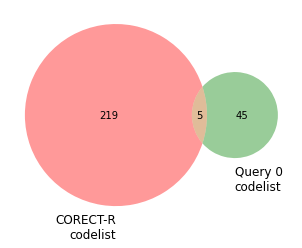

In [ ]:
reference_codelist = pd.read_csv('codelists/CORECT_Dictionary.csv')
reference_codelist = reference_codelist[['OPCS_4CHAR','Mapping1','Mapping2','CorectRMapping']]
reference_codelist['present'] = reference_codelist['OPCS_4CHAR'].isin( opcs_codelist_out['opcs'] )

venn2([
    set( reference_codelist[ ~ reference_codelist['CorectRMapping'].isna() ]['OPCS_4CHAR'] ),
    set( opcs_codelist_out['opcs'] )
    ], 
    ['CORECT-R\ncodelist','Query '+str(q)+'\ncodelist'])

print( reference_codelist.groupby('Mapping1')['present'].mean() )
print( reference_codelist.groupby('CorectRMapping')['present'].mean() )

<AxesSubplot:ylabel='Count'>

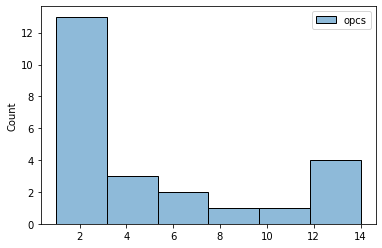

In [ ]:
opcs_codelist_out['snomed'] = opcs_codelist_out['snomed'].astype(str)
snomed_opcs_coverage = query_results_output.merge(opcs_codelist_out, left_on='conceptId', right_on='snomed', how='left')
snomed_opcs_coverage = snomed_opcs_coverage[['conceptId','opcs']]

# For each SNOMED code in the query results, count how many OPCS codes it maps to (should ignore NaNs)
snomed_opcs_coverage.groupby('conceptId').count()

sns.histplot( snomed_opcs_coverage.groupby('conceptId').count() )

/var/folders/jv/r9wkk1k157jgllfhz9lygd0r0000gp/T/ipykernel_30919/3065474195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_results_output['conceptId'] = query_results_output['conceptId'].astype(str)


<AxesSubplot:ylabel='Count'>

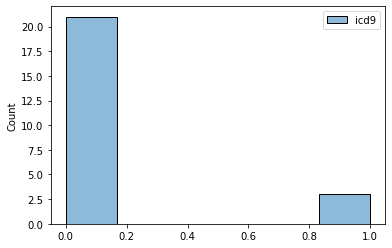

In [ ]:
query_results_output['conceptId'] = query_results_output['conceptId'].astype(str)
icd9_codelist_out['snomed'] = icd9_codelist_out['snomed'].astype(str)

snomed_icd9_coverage = query_results_output.merge(icd9_codelist_out, left_on='conceptId', right_on='snomed', how='left')
snomed_icd9_coverage = snomed_icd9_coverage[['conceptId','icd9']]

sns.histplot( snomed_icd9_coverage.groupby('conceptId').count() )

In [ ]:
icd10_codelist['icd9cm'] = icd10_codelist['icd9cm'].astype(str)
icd9_codelist_out['icd9'] = icd9_codelist_out['icd9'].astype(str).str.replace('.','')

/var/folders/jv/r9wkk1k157jgllfhz9lygd0r0000gp/T/ipykernel_30919/2082952341.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  icd9_codelist_out['icd9'] = icd9_codelist_out['icd9'].astype(str).str.replace('.','')


<AxesSubplot:ylabel='Count'>

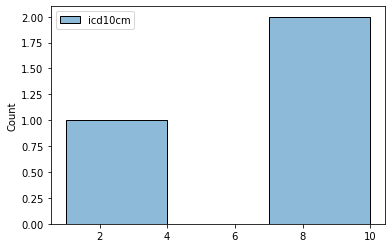

In [ ]:
icd9_icd10_coverage = icd9_codelist_out.merge(icd10_codelist, left_on='icd9', right_on='icd9cm', how='left')
icd9_icd10_coverage = icd9_icd10_coverage[['icd9cm','icd10cm']]

sns.histplot( icd9_icd10_coverage.groupby('icd9cm').count() )

In [ ]:
# queries = ['>>' + i + '. 260686004 | Method (attribute) |' for i in snomed_list_output['idAndFsnTerm']]
# sess_results = snomed_utils.run_ecl_queries(queries, 10000, SNOMED_SERVER+VERSION)

# methods_dict = []
# for r in sess_results:
#     results_df1 = pd.DataFrame(r['items'])
#     try:
#         methods_dict.append( list(results_df1['idAndFsnTerm']) )
#     except:
#         print(' error ')
#         methods_dict.append(None)



# methods_df = pd.DataFrame(data={'concept':snomed_list_output['idAndFsnTerm'],'parents':methods_dict,'category':None})
# #methods_df.to_csv('concept_methods')

# # Get categories

# methods_dict = dict()
# parents_dict = dict()

# for i in snomed_list_output['idAndFsnTerm']:
#     q = '>>' + i + '. 260686004 | Method (attribute) |'
#     snomed_results = snomed_utils.run_ecl_query(q, 10000, SNOMED_SERVER+VERSION)
#     snomed_results_df1 = pd.DataFrame(snomed_results['items'])
#     try:
#         methods_dict[i] = list(snomed_results_df1['idAndFsnTerm'])
#     except:
#         print('methods error '+i)
#         methods_dict[i] = None

#     #q = '>>' + i + '. 116680003 | Is a (attribute) |'
#     #snomed_results = snomed_utils.run_ecl_query(q, 10000, SNOMED_SERVER+VERSION)
#     #snomed_results_df2 = pd.DataFrame(snomed_results['items'])
#     #try:
#     #    parents_dict[i] = list(snomed_results_df2['idAndFsnTerm'])
#     #except:
#     #    print('parents error '+i)

#methods_df = pd.DataFrame(data={'concept':methods_dict.keys(),'parents':methods_dict.values(),'category':None})
#display( methods_df.head() )

#parents_df = pd.DataFrame(data={'concept':parents_dict.keys(),'parents':parents_dict.values(),'category':None})
#display( parents_df.head() )
#parents_df.to_csv('concept_parents')

parents_df = pd.read_csv('concept_parents')
parents_df['parents'] = [ ast.literal_eval(i) for i in parents_df['parents'] ]

methods_df = pd.read_csv('concept_methods')
methods_df['parents'] = methods_df['parents'].replace(np.nan, '[]')
methods_df['parents'] = [ ast.literal_eval(i) for i in methods_df['parents'] ]

methods_and_parents = pd.DataFrame(data={'concept':parents_df['concept'],'parents':parents_df['parents'],'methods':methods_df['parents'],'category':None})
methods_and_parents


#methods_and_parents.loc[ [('360037004 | Imaging - action (qualifier value) |'  in l) if l is not None else False for l in methods_and_parents["methods"]  ] , "category"] = 'imaging'
#parents_df.loc[ ['43075005 | Partial resection of colon (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'
#parents_df.loc[ ['23968004 | Excision of colon (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'major resection'
#parents_df.loc[ ['108193009 | Abdomen destructive procedure (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'
#parents_df.loc[ ['108193009 | Abdomen destructive procedure (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'

#methods_and_parents.loc[ ['82874003 | Operation on colon (procedure) |'  in l for l in parents_df["methods_and_parents"] ], "category"] = 'surgery'
#methods_and_parents.loc[ ['86273004 | Biopsy (procedure) |'  in l for l in parents_df["methods_and_parents"] ], "category"] = 'testing'

for index,row in methods_and_parents.iterrows():
    # if (row['methods'] is not None) and ('360037004 | Imaging - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'imaging'


    if (row['methods'] is not None) and ('129433002 | Inspection - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'
    if (row['methods'] is not None) and ('129314006 | Biopsy - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'
    if (row['methods'] is not None) and ('129314006 | Biopsy - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'


    # if (row['methods'] is not None) and ('129427006 | Reduction - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'
    # if (row['methods'] is not None) and ('129382001 | Destruction - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'
    # if (row['methods'] is not None) and ('257903006 | Repair - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'

    # if (row['methods'] is not None) and ('129304002 | Excision - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery' # Resection

    # if (row['methods'] is not None) and ('360021005 | Bypass - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'Bypass'

    # if (row['concept'] == '1260482004 | Insertion of stent into colon using colonoscope (procedure) |'):
    #     methods_and_parents.iloc[index]['category'] = 'Stent'

    if (row['methods'] is not None) and ('129284003 | Surgical action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Surgery other'

    if (row['methods'] is not None) and ('360037004 | Imaging - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Imaging'

    if (row['methods'] is not None) and re.search('stoma',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stoma'

    if (row['methods'] is not None) and re.search('exteriorization',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stoma'


    if (row['methods'] is not None) and any( [re.search('resection',i, re.IGNORECASE) for i in row['parents']] ):
        methods_and_parents.iloc[index]['category'] = 'Resection'
    if (row['methods'] is not None) and re.search('colectomy',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Resection'

    if (row['methods'] is not None) and ('360021005 | Bypass - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Bypass'


        

    if (row['methods'] is not None) and re.search('stent',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stent'



#methods_df = pd.DataFrame(data={'concept':sess_results.keys(),'parents':sess_results.values(),'category':None})
#methods_df.to_csv('concept_methods')
        
category_dict = dict(zip([int(i[0]) for i in methods_and_parents['concept'].str.split(' ',1)], methods_and_parents['category']))
category_dict

#methods_df.loc[ ['360037004 | Imaging - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'imaging'
####methods_df.loc[ ['129304002 | Excision - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'excision'
#methods_df.loc[ ['129314006 | Biopsy - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'biopsy'
#methods_df.loc[ ['360021005 | Bypass - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'bypass'



display( methods_and_parents )
print( sum(methods_and_parents.category.isna()) )
print( sum(methods_and_parents.category.isna()) / len(methods_and_parents) * 100 )


FileNotFoundError: [Errno 2] No such file or directory: 'concept_parents'